# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Buy and Hold Strategy

The buy and hold is an investment strategy in which the investor buys stocks and hold them for the long term. The holding period of the stocks can vary from months to years or even decades. In this buy and hold strategy, you create a portfolio of eight stocks from the US market and rebalance them every month.  

After completing this notebook, you will be to code buy and hold strategy and plot the portfolio returns. 


In this notebook, you will perform the following steps:

1. [Read daily stocks data](#read)
2. [Convert daily to monthly data](#monthly)
3. [Calculate monthly returns](#monthly_returns)
4. [Calculate portfolio returns](#portfolio_returns)
5. [Plot cumulative portfolio returns](#plot)

<a id='read'></a> 
## Read daily stocks data

The closing price of the stocks are stored in the csv file. `read_csv` method of `pandas` can be used the read csv files.

Syntax: 
```python
import pandas as pd
pd.read_csv(filename,index_col)
```
    1. filename: name of the file in the string format
    2. index_col: column(s) to use as the row labels of the dataframe, either given as string name or column index

In [1]:
# Import pandas as pd
import pandas as pd

# Read the stocks data stored in a csv file
daily_stocks_data = pd.read_csv(
    '../data_modules/stocks_data_2010_2020.csv', index_col=0)

# Set the index to datetime
daily_stocks_data.index = pd.to_datetime(daily_stocks_data.index)
daily_stocks_data.head()

,Amazon,Apple,Walmart,Micron,Bank of America,Coca-Cola,Boeing,American Express
Date,,,,,,,,
2009-12-31,6.492372,134.520004,34.291534,41.856789,13.179974,18.804321,10.56,40.802689
2010-01-04,6.593426,133.899994,34.630035,43.441975,13.731325,18.817513,10.85,41.398109
2010-01-05,6.604825,134.690002,34.553879,44.864773,14.177655,18.589882,11.17,40.985886
2010-01-06,6.499768,132.250000,35.112431,46.225727,14.343938,18.583282,11.22,40.894283
2010-01-07,6.487752,130.000000,35.681915,48.097031,14.816527,18.537094,10.84,40.917183


<a id='monthly'></a> 
## Convert daily to monthly data

`DataFrame.asfreq()` function is used to convert timeseries to specified frequency. 

Syntax: 
```python
DataFrame.asfreq('M')
```
    M: monthly frequency

In [2]:
# Convert daily to monthly frequency
monthly_stocks_data = daily_stocks_data.asfreq('M')

# Drop NaN values
monthly_stocks_data = monthly_stocks_data.dropna()
monthly_stocks_data.head()

,Amazon,Apple,Walmart,Micron,Bank of America,Coca-Cola,Boeing,American Express
Date,,,,,,,,
2009-12-31,6.492372,134.520004,34.291534,41.856789,13.179974,18.804321,10.56,40.802689
2010-03-31,7.240106,135.770004,35.222775,56.530022,15.631181,18.443974,10.37,42.683178
2010-04-30,8.043912,137.100006,39.371647,56.389893,15.613656,17.924196,9.35,41.178520
2010-06-30,7.749377,109.260002,34.043896,49.137108,12.591907,17.094294,8.49,37.116917
2010-08-31,7.489662,124.830002,34.189678,48.159416,10.918247,19.058840,6.46,38.941193


<a id='monthly_returns'></a> 
## Calculate monthly returns

`DataFrame.pct_change()` is used to calculate the percentage returns of the prices. 

Syntax: 
```python
DataFrame.pct_change()
```

In [3]:
# Calculate monthly percentage change
monthly_percent_change = monthly_stocks_data.pct_change()

# Drop NaN values
monthly_percent_change = monthly_percent_change.dropna()
monthly_percent_change.head()

,Amazon,Apple,Walmart,Micron,Bank of America,Coca-Cola,Boeing,American Express
Date,,,,,,,,
2010-03-31,0.115171,0.009292,0.027157,0.350558,0.185980,-0.019163,-0.017992,0.046087
2010-04-30,0.111021,0.009796,0.117789,-0.002479,-0.001121,-0.028181,-0.098361,-0.035252
2010-06-30,-0.036616,-0.203063,-0.135319,-0.128619,-0.193532,-0.046301,-0.091979,-0.098634
2010-08-31,-0.033514,0.142504,0.004282,-0.019897,-0.132915,0.114924,-0.239105,0.049149
2010-09-30,0.167215,0.258191,0.054176,0.088500,0.052209,0.063233,0.116099,0.067411


<a id='portfolio_returns'></a> 
## Calculate portfolio returns

We allocate capital to each stock equally. Therefore, we take the mean of monthly returns to calculate the portfolio returns.

**Note:** If you want to assign specific weights to individual stocks, then you need to multiply the allocation with each stock return and sum the product for all stocks to get total portfolio returns.

Syntax: 
```python
DataFrame.mean(axis)
```
    1. axis: 0 for rows and 1 for columns


`cumprod()` function is used to calculate the cumulative product of the returns.

In [4]:
# Calculate portfolio returns
portfolio_returns = monthly_percent_change.mean(axis=1)

# Calculate cumulative portfolio returns
cum_portfolio_returns = (portfolio_returns+1).cumprod()

<a id='plot'></a> 
## Plot cumulative portfolio returns

You will use matplotlib to plot the cumulative portfolio returns. Then you will set the titles and labels for the plot.

Please refer to the section 5 of the course to revise the plotting concepts, in case of any doubts.

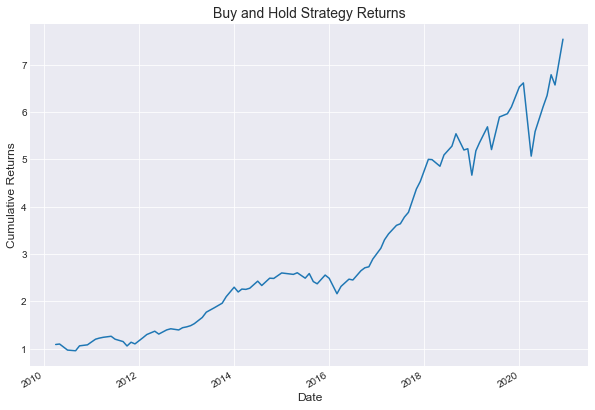

In [5]:
# Import matplotlib as an alias plt and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Plot cumulative strategy returns
cum_portfolio_returns.plot(figsize=(10, 7))

# Set title and labels for the plot
plt.title('Buy and Hold Strategy Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.show()

As you can see, the strategy performs well over 10 years. Now it's your chance to make the strategy better.
1. Try out the strategy on different stocks
2. Change the rebalancing period from monthly to quarterly, yearly or other frequency.

In the upcoming section, you will learn to deploy the same strategy in the live market.<br><br>